In [4]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# 1.) Import Data from FRED

In [5]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
data.dropna(inplace = True)

In [8]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [10]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [11]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [12]:
model1 = sm.OLS(y_in, X_in).fit()

In [50]:
model1.rsquared_adj

0.08177414359692936

In [51]:
model1.mse_total

11.063108349339682

In [52]:
model1.params

const            3.475026
Unemployment     0.530746
HousingStarts   -0.000481
Inflation        0.007728
dtype: float64

# 4.) Recreate the graph fro your model

In [13]:
import matplotlib.pyplot as plt

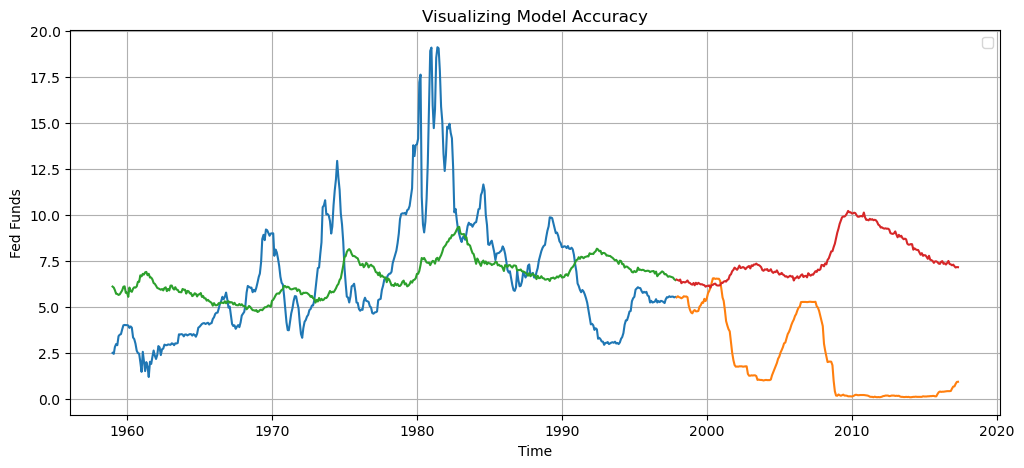

In [14]:
plt.figure(figsize = (12,5))

plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [17]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
max_degrees = 3

Degree:  1


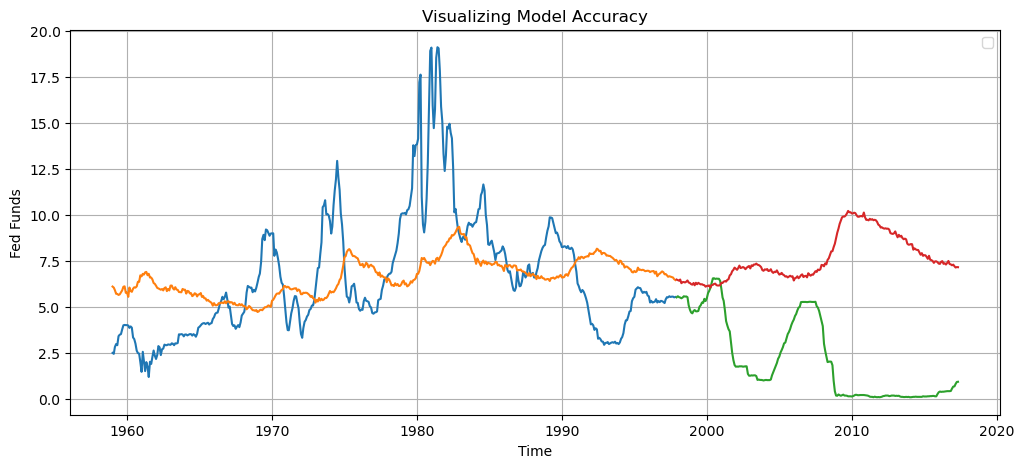

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566676
Degree:  2


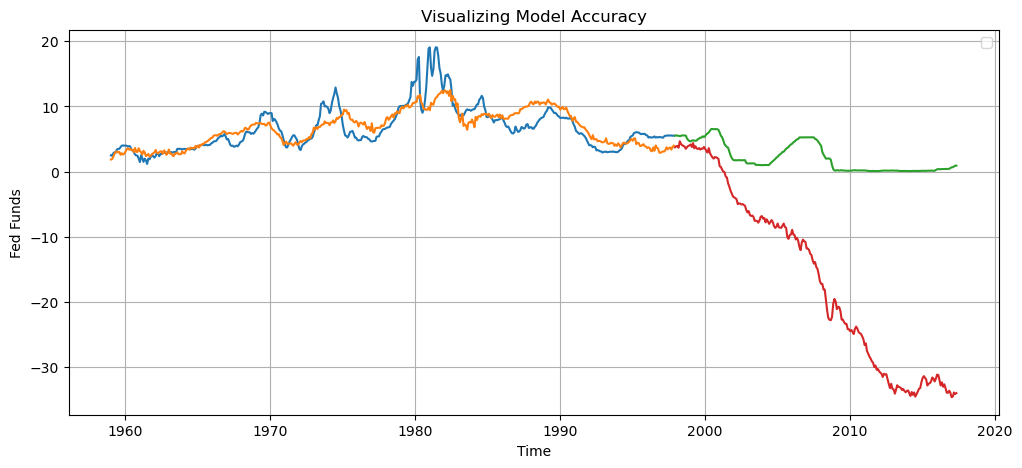

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650990363203
Degree:  3


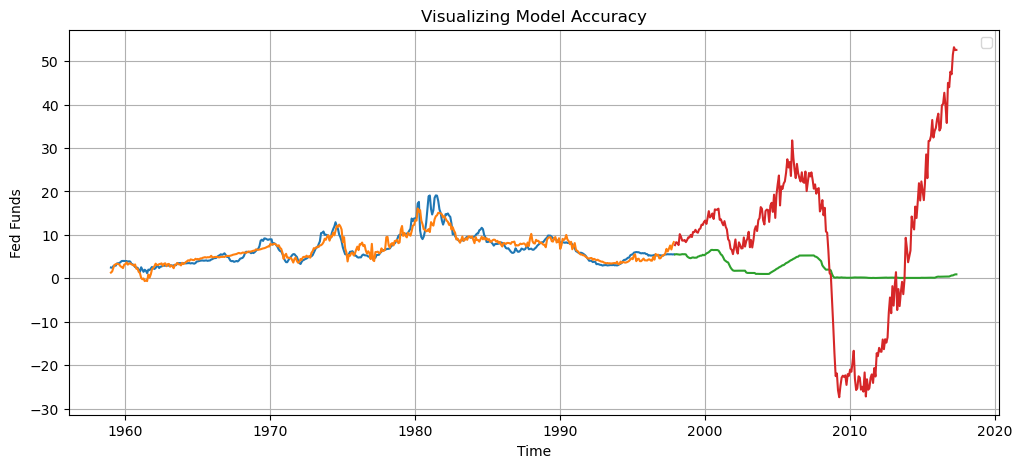

Insample MSE :  1.872363627194613
Outsample MSE :  371.7661890061883


In [20]:
for degrees in range(1, max_degrees+1):
    print("Degree: ",degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))

    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(in_preds)
    plt.plot(y_out)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly),y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As the degree increases from a low value, the model begins to transition from underfitting towards appropriate fitting, where the MSE generally decreases because the model starts capturing the fundamental patterns in the data better. However, as the degree increases further, the model might enter the overfitting phase, where the MSE on the test set begins to increase because the model starts fitting too closely to the random noise in the training data.